# Data Decal Final Project

I would like to answer the question “How does choice of major affect income in the short-term and long-term?”. This problem is important because it can support or weaken the common belief that, for example, computer science is the only degree that can gives graduates high income. The college student population in California is affected.

To begin the investigation to my question, I would need to collect major, income shortly after graduation, and income long after graduation. Since there are many majors, many that are considered to be in the same group, I will further aggregate the data by grouping majors. Then, I will plot the data in a line plot and find the line of best fit to figure out the slope (increase of income over time) and intercept (starting salary after graduation).

I will use linear modeling and grouping to complete this project. My first goal is to aggregate the data appropriately. This might be tricky because the way I group can affect my results. My second goal is to plot the line graph and find the lines of best fit. My third goal is to generate my conclusion. I predict that though computer science majors may earn more right out of college, in the long run, business majors may earn around the same.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
income0 = pd.read_csv('Earnings_By_Discipline_data.csv', sep='\t')
income1 = pd.read_csv('Earnings_By_Discipline_data (1).csv', sep='\t')
income2 = pd.read_csv('Earnings_By_Discipline_data (2).csv', sep='\t')
income3 = pd.read_csv('Earnings_By_Discipline_data (3).csv', sep='\t')
income4 = pd.read_csv('Earnings_By_Discipline_data (4).csv', sep='\t')
income5 = pd.read_csv('Earnings_By_Discipline_data (5).csv', sep='\t')
income6 = pd.read_csv('Earnings_By_Discipline_data (6).csv', sep='\t')
income7 = pd.read_csv('Earnings_By_Discipline_data (7).csv', sep='\t')
income8 = pd.read_csv('Earnings_By_Discipline_data (8).csv', sep='\t')
income9 = pd.read_csv('Earnings_By_Discipline_data (9).csv', sep='\t')
income10 = pd.read_csv('Earnings_By_Discipline_data (10).csv', sep='\t')
income11 = pd.read_csv('Earnings_By_Discipline_data (11).csv', sep='\t')
income12 = pd.read_csv('Earnings_By_Discipline_data (12).csv', sep='\t')
income13 = pd.read_csv('Earnings_By_Discipline_data (13).csv', sep='\t')

In [3]:
income0

,Majors with other grouped,Years Out,Aggregation,Number of Records
0,Nursing,2,83980.090,714
1,Computer Science,2,77724.910,13313
2,Engineering,2,68278.595,35668
3,Business,2,51526.380,33102
4,Agriculture,2,50850.430,3099
5,Economics,2,50836.710,25295
6,Mathematics,2,49961.650,8261
7,Physics,2,46931.430,1783
8,Architecture,2,46003.420,3308
9,Legal Studies,2,43398.330,2940


Below, I separate the majors into groups of my own choosing.

In [4]:
group1 = ['Mathematics', 'Physics', 'Chemistry', 'Geography', 'Biology', 'Philosophy'] #pure sciences
group2 = ['Engineering', 'Computer Science', 'Architecture'] #engineering
group3 = ['Nursing', 'Business' ] #professional
group4 = ['Foreign Language', 'English/Literature'] #creative arts
group5 = ['Economics', 'Communications', 'Political Science', 'Public Health', 'Sociology', 'Psychology', 'History', 'Anthropology', 'Legal Studies'] #social sciences
group6 = ['Agriculture', 'Education'] #social services
#others
#later isolate CS and business to test my hypothesis

Below, I clean up the data by performing the grouping and renaming columns, dropping others in the process.

In [5]:
def aggregate(df):
    df['Majors with other grouped'] = df['Majors with other grouped'].apply(
        lambda x: 'Pure Sciences' if x in group1 else x)
    df['Majors with other grouped'] = df['Majors with other grouped'].apply(
        lambda x: 'Engineering' if x in group2 else x)
    df['Majors with other grouped'] = df['Majors with other grouped'].apply(
        lambda x: 'Professional' if x in group3 else x)
    df['Majors with other grouped'] = df['Majors with other grouped'].apply(
        lambda x: 'Creative Arts' if x in group4 else x)
    df['Majors with other grouped'] = df['Majors with other grouped'].apply(
        lambda x: 'Social Sciences' if x in group5 else x)
    df['Majors with other grouped'] = df['Majors with other grouped'].apply(
        lambda x: 'Social Services' if x in group6 else x)
    df = df.rename(columns={'Majors with other grouped': 'Major groups'})
    df = df.rename(columns={'Aggregation': int(df['Years Out'][0])}).drop(columns='Years Out')
    return df.groupby('Major groups').mean().drop(columns='Number of Records')

In [6]:
income0 = aggregate(income0)
income1 = aggregate(income1)
income2 = aggregate(income2)
income3 = aggregate(income3)
income4 = aggregate(income4)
income5 = aggregate(income5)
income6 = aggregate(income6)
income7 = aggregate(income7)
income8 = aggregate(income8)
income9 = aggregate(income9)
income10 = aggregate(income10)
income11 = aggregate(income11)
income12 = aggregate(income12)
income13 = aggregate(income13)

In [7]:
income0

,2
Major groups,
Creative Arts,32851.680000
Engineering,64002.308333
Other Majors,35289.250000
Professional,67753.235000
Pure Sciences,41330.584167
Social Sciences,38155.198889
Social Services,41215.552500


In [8]:
income11

,13
Major groups,
Creative Arts,77794.905000
Engineering,120353.691667
Other Majors,80163.270000
Professional,129752.852500
Pure Sciences,100935.702500
Social Sciences,94609.185556
Social Services,102153.342500


Below, I perform a big merge on each dataframe to produce a giant dataframe across all years after graduation.

In [9]:
incomes = pd.merge(income0, income1, on='Major groups')
incomes = pd.merge(incomes, income2, on='Major groups')
incomes = pd.merge(incomes, income3, on='Major groups')
incomes = pd.merge(incomes, income4, on='Major groups')
incomes = pd.merge(incomes, income5, on='Major groups')
incomes = pd.merge(incomes, income6, on='Major groups')
incomes = pd.merge(incomes, income7, on='Major groups')
incomes = pd.merge(incomes, income8, on='Major groups')
incomes = pd.merge(incomes, income9, on='Major groups')
incomes = pd.merge(incomes, income10, on='Major groups')
incomes = pd.merge(incomes, income11, on='Major groups')
incomes = pd.merge(incomes, income12, on='Major groups')
incomes = pd.merge(incomes, income13, on='Major groups')
incomes

,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Major groups,,,,,,,,,,,,,,
Creative Arts,32851.680000,38934.040000,44115.180000,49472.185000,54362.887500,58331.215000,61771.565000,65009.547500,67895.380000,71340.352500,74411.660000,77794.905000,80432.990000,83616.185000
Engineering,64002.308333,71332.833333,77434.171667,82439.791667,87630.933333,92450.545000,97137.845000,101558.655000,106209.876667,111105.466667,116071.491667,120353.691667,124733.081667,128282.623333
Other Majors,35289.250000,41644.310000,46763.370000,51506.260000,56171.760000,60390.830000,63991.080000,67263.000000,70666.960000,73657.530000,76926.730000,80163.270000,83484.240000,86211.360000
Professional,67753.235000,76313.625000,82045.415000,87116.820000,92717.767500,100210.530000,103522.595000,107845.577500,115224.822500,118052.155000,121086.865000,129752.852500,132178.565000,132697.825000
Pure Sciences,41330.584167,48609.840833,54372.281667,60662.943333,67027.565833,72333.073333,76771.318333,82440.665833,87046.024167,92717.917500,97333.057500,100935.702500,104441.937500,107209.667500
Social Sciences,38155.198889,44759.577222,50363.935000,56535.836667,62518.464444,67682.472778,72557.608889,77231.216111,81760.297778,86005.324444,90697.525556,94609.185556,99775.887222,99014.990000
Social Services,41215.552500,53459.132500,62200.450000,67482.930000,74223.910000,77048.895000,81702.385000,89414.570000,90233.957500,94631.220000,97924.957500,102153.342500,106726.855000,107871.060000


Below, I transpose the dataframe for ease of plotting and calculating the regression line.

In [10]:
incomes_transposed = incomes.T
incomes_transposed

Major groups,Creative Arts,Engineering,Other Majors,Professional,Pure Sciences,Social Sciences,Social Services
2,32851.6800,64002.308333,35289.25,67753.2350,41330.584167,38155.198889,41215.5525
3,38934.0400,71332.833333,41644.31,76313.6250,48609.840833,44759.577222,53459.1325
4,44115.1800,77434.171667,46763.37,82045.4150,54372.281667,50363.935000,62200.4500
5,49472.1850,82439.791667,51506.26,87116.8200,60662.943333,56535.836667,67482.9300
6,54362.8875,87630.933333,56171.76,92717.7675,67027.565833,62518.464444,74223.9100
7,58331.2150,92450.545000,60390.83,100210.5300,72333.073333,67682.472778,77048.8950
8,61771.5650,97137.845000,63991.08,103522.5950,76771.318333,72557.608889,81702.3850
9,65009.5475,101558.655000,67263.00,107845.5775,82440.665833,77231.216111,89414.5700
10,67895.3800,106209.876667,70666.96,115224.8225,87046.024167,81760.297778,90233.9575
11,71340.3525,111105.466667,73657.53,118052.1550,92717.917500,86005.324444,94631.2200


Below, I proceed to my second goal of calculating the slopes and intercepts of the lines of best fit for each major group.

In [11]:
#plt.scatter(incomes_transposed.index, incomes_transposed['Creative Arts'])

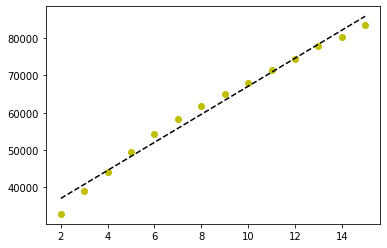

In [12]:
from pylab import *
x=np.array(incomes_transposed.index)
y=np.array(incomes_transposed['Creative Arts'])
m,b = polyfit(list(x), y, 1) 
plot(x, y, 'yo', x, m*x+b, '--k') 
show()

In [13]:
incomes.index

Index(['Creative Arts', 'Engineering', 'Other Majors', 'Professional',
       'Pure Sciences', 'Social Sciences', 'Social Services'],
      dtype='object', name='Major groups')

In [14]:
def add_linear_regression():
    arr = []
    def slope_intercept(col):
        x=np.array(incomes_transposed.index)
        y=np.array(incomes_transposed[col])
        m,b = polyfit(list(x), y, 1)
        arr.append((int(round(m)),int(round(b))))
    for major in incomes.index:
        slope_intercept(major)
    incomes.insert(0, '(Slope, Intercept)', arr)
    return incomes

add_linear_regression()

,"(Slope, Intercept)",2,3,4,5,6,7,8,9,10,11,12,13,14,15
Major groups,,,,,,,,,,,,,,,
Creative Arts,"(3760, 29490)",32851.680000,38934.040000,44115.180000,49472.185000,54362.887500,58331.215000,61771.565000,65009.547500,67895.380000,71340.352500,74411.660000,77794.905000,80432.990000,83616.185000
Engineering,"(4852, 57380)",64002.308333,71332.833333,77434.171667,82439.791667,87630.933333,92450.545000,97137.845000,101558.655000,106209.876667,111105.466667,116071.491667,120353.691667,124733.081667,128282.623333
Other Majors,"(3785, 31692)",35289.250000,41644.310000,46763.370000,51506.260000,56171.760000,60390.830000,63991.080000,67263.000000,70666.960000,73657.530000,76926.730000,80163.270000,83484.240000,86211.360000
Professional,"(5059, 61747)",67753.235000,76313.625000,82045.415000,87116.820000,92717.767500,100210.530000,103522.595000,107845.577500,115224.822500,118052.155000,121086.865000,129752.852500,132178.565000,132697.825000
Pure Sciences,"(5109, 34661)",41330.584167,48609.840833,54372.281667,60662.943333,67027.565833,72333.073333,76771.318333,82440.665833,87046.024167,92717.917500,97333.057500,100935.702500,104441.937500,107209.667500
Social Sciences,"(4831, 31914)",38155.198889,44759.577222,50363.935000,56535.836667,62518.464444,67682.472778,72557.608889,77231.216111,81760.297778,86005.324444,90697.525556,94609.185556,99775.887222,99014.990000
Social Services,"(4779, 41256)",41215.552500,53459.132500,62200.450000,67482.930000,74223.910000,77048.895000,81702.385000,89414.570000,90233.957500,94631.220000,97924.957500,102153.342500,106726.855000,107871.060000


Below, I plot the lines in one graph. Not surprisingly, Engineering and Professional majors are at the top. Surprising to me, majors I consider Social Services come in third place.

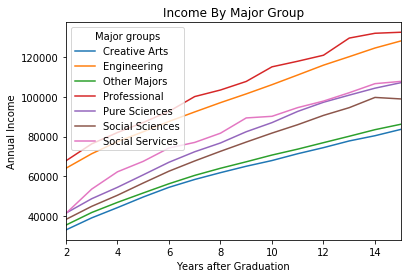

In [15]:
ax = incomes_transposed.plot()
ax.set_xlabel('Years after Graduation')
ax.set_ylabel('Annual Income')
ax.set_title('Income By Major Group');

Below, I proceed to my third and last goal of verifying the strength of my hypothesis. I first regather the original dataframes then ignore rows that do not correspond to Computer Science and Business majors, before doing a similar cleaning, merging, transposing, and plotting.

In [16]:
i0 = pd.read_csv('Earnings_By_Discipline_data.csv', sep='\t')
i1 = pd.read_csv('Earnings_By_Discipline_data (1).csv', sep='\t')
i2 = pd.read_csv('Earnings_By_Discipline_data (2).csv', sep='\t')
i3 = pd.read_csv('Earnings_By_Discipline_data (3).csv', sep='\t')
i4 = pd.read_csv('Earnings_By_Discipline_data (4).csv', sep='\t')
i5 = pd.read_csv('Earnings_By_Discipline_data (5).csv', sep='\t')
i6 = pd.read_csv('Earnings_By_Discipline_data (6).csv', sep='\t')
i7 = pd.read_csv('Earnings_By_Discipline_data (7).csv', sep='\t')
i8 = pd.read_csv('Earnings_By_Discipline_data (8).csv', sep='\t')
i9 = pd.read_csv('Earnings_By_Discipline_data (9).csv', sep='\t')
i10 = pd.read_csv('Earnings_By_Discipline_data (10).csv', sep='\t')
i11 = pd.read_csv('Earnings_By_Discipline_data (11).csv', sep='\t')
i12 = pd.read_csv('Earnings_By_Discipline_data (12).csv', sep='\t')
i13 = pd.read_csv('Earnings_By_Discipline_data (13).csv', sep='\t')

In [17]:
csorbusiness = ['Computer Science', 'Business']
i0 = i0[i0['Majors with other grouped'].isin(csorbusiness)]
i1 = i1[i1['Majors with other grouped'].isin(csorbusiness)]
i2 = i2[i2['Majors with other grouped'].isin(csorbusiness)]
i3 = i3[i3['Majors with other grouped'].isin(csorbusiness)]
i4 = i4[i4['Majors with other grouped'].isin(csorbusiness)]
i5 = i5[i5['Majors with other grouped'].isin(csorbusiness)]
i6 = i6[i6['Majors with other grouped'].isin(csorbusiness)]
i7 = i7[i7['Majors with other grouped'].isin(csorbusiness)]
i8 = i8[i8['Majors with other grouped'].isin(csorbusiness)]
i9 = i9[i9['Majors with other grouped'].isin(csorbusiness)]
i10 = i10[i10['Majors with other grouped'].isin(csorbusiness)]
i11 = i11[i11['Majors with other grouped'].isin(csorbusiness)]
i12 = i12[i12['Majors with other grouped'].isin(csorbusiness)]
i13 = i13[i13['Majors with other grouped'].isin(csorbusiness)]

In [18]:
i0 = i0.rename(columns={'Aggregation': int(i0['Years Out'].iloc[0])}).drop(columns=['Years Out', 'Number of Records'])
i1 = i1.rename(columns={'Aggregation': int(i1['Years Out'].iloc[0])}).drop(columns=['Years Out', 'Number of Records'])
i2 = i2.rename(columns={'Aggregation': int(i2['Years Out'].iloc[0])}).drop(columns=['Years Out', 'Number of Records'])
i3 = i3.rename(columns={'Aggregation': int(i3['Years Out'].iloc[0])}).drop(columns=['Years Out', 'Number of Records'])
i4 = i4.rename(columns={'Aggregation': int(i4['Years Out'].iloc[0])}).drop(columns=['Years Out', 'Number of Records'])
i5 = i5.rename(columns={'Aggregation': int(i5['Years Out'].iloc[0])}).drop(columns=['Years Out', 'Number of Records'])
i6 = i6.rename(columns={'Aggregation': int(i6['Years Out'].iloc[0])}).drop(columns=['Years Out', 'Number of Records'])
i7 = i7.rename(columns={'Aggregation': int(i7['Years Out'].iloc[0])}).drop(columns=['Years Out', 'Number of Records'])
i8 = i8.rename(columns={'Aggregation': int(i8['Years Out'].iloc[0])}).drop(columns=['Years Out', 'Number of Records'])
i9 = i9.rename(columns={'Aggregation': int(i9['Years Out'].iloc[0])}).drop(columns=['Years Out', 'Number of Records'])
i10 = i10.rename(columns={'Aggregation': int(i10['Years Out'].iloc[0])}).drop(columns=['Years Out', 'Number of Records'])
i11 = i11.rename(columns={'Aggregation': int(i11['Years Out'].iloc[0])}).drop(columns=['Years Out', 'Number of Records'])
i12 = i12.rename(columns={'Aggregation': int(i12['Years Out'].iloc[0])}).drop(columns=['Years Out', 'Number of Records'])
i13 = i13.rename(columns={'Aggregation': int(i13['Years Out'].iloc[0])}).drop(columns=['Years Out', 'Number of Records'])

In [19]:
csbusiness = pd.merge(i0, i1, on='Majors with other grouped')
csbusiness = pd.merge(csbusiness, i2, on='Majors with other grouped')
csbusiness = pd.merge(csbusiness, i3, on='Majors with other grouped')
csbusiness = pd.merge(csbusiness, i4, on='Majors with other grouped')
csbusiness = pd.merge(csbusiness, i5, on='Majors with other grouped')
csbusiness = pd.merge(csbusiness, i6, on='Majors with other grouped')
csbusiness = pd.merge(csbusiness, i7, on='Majors with other grouped')
csbusiness = pd.merge(csbusiness, i8, on='Majors with other grouped')
csbusiness = pd.merge(csbusiness, i9, on='Majors with other grouped')
csbusiness = pd.merge(csbusiness, i10, on='Majors with other grouped')
csbusiness = pd.merge(csbusiness, i11, on='Majors with other grouped')
csbusiness = pd.merge(csbusiness, i12, on='Majors with other grouped')
csbusiness = pd.merge(csbusiness, i13, on='Majors with other grouped')

In [20]:
csbusiness

,Majors with other grouped,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Computer Science,77724.91,86129.79,92832.805,97958.07,103717.105,109050.48,114003.86,118547.085,124039.255,128672.32,134571.56,139867.27,143618.445,147260.54
1,Business,51526.38,59066.63,65192.000,70898.24,76613.345,82363.68,87685.50,92230.425,97537.145,102437.05,108008.06,113954.29,118073.340,122588.00


In [21]:
csbusiness.reset_index(drop=True, inplace=True)
csbusiness

,Majors with other grouped,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Computer Science,77724.91,86129.79,92832.805,97958.07,103717.105,109050.48,114003.86,118547.085,124039.255,128672.32,134571.56,139867.27,143618.445,147260.54
1,Business,51526.38,59066.63,65192.000,70898.24,76613.345,82363.68,87685.50,92230.425,97537.145,102437.05,108008.06,113954.29,118073.340,122588.00


In [22]:
csbusiness = csbusiness.set_index(['Majors with other grouped'])

In [23]:
csbusiness_transposed = csbusiness.T
csbusiness_transposed

Majors with other grouped,Computer Science,Business
2,77724.910,51526.380
3,86129.790,59066.630
4,92832.805,65192.000
5,97958.070,70898.240
6,103717.105,76613.345
7,109050.480,82363.680
8,114003.860,87685.500
9,118547.085,92230.425
10,124039.255,97537.145
11,128672.320,102437.050


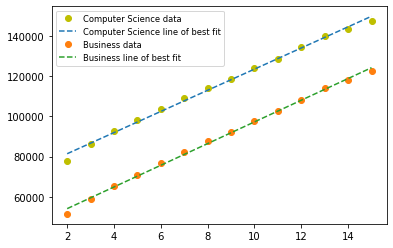

In [24]:
arr1 = []
x=np.array(csbusiness_transposed.index)
y=np.array(csbusiness_transposed['Computer Science'])
m,b = polyfit(list(x), y, 1)
#plot(x, y, 'yo', x, m*x+b, '--k') 
#show()
arr1.append((int(round(m)),int(round(b))))
x1=np.array(csbusiness_transposed.index)
y1=np.array(csbusiness_transposed['Business'])
m1,b1 = polyfit(list(x1), y1, 1)
plot(x, y, 'yo', label='Computer Science data')
plot(x, m*x+b, '--', label='Computer Science line of best fit')
plot(x1, y1, 'o', label='Business data')
plot(x1, m1*x1+b1, '--', label='Business line of best fit')
plt.legend(fontsize="small")
show()
arr1.append((int(round(m1)),int(round(b1))))
csbusiness.insert(0, '(Slope, Intercept)', arr1)

In [25]:
csbusiness

,"(Slope, Intercept)",2,3,4,5,6,7,8,9,10,11,12,13,14,15
Majors with other grouped,,,,,,,,,,,,,,,
Computer Science,"(5253, 70918)",77724.91,86129.79,92832.805,97958.07,103717.105,109050.48,114003.86,118547.085,124039.255,128672.32,134571.56,139867.27,143618.445,147260.54
Business,"(5386, 43373)",51526.38,59066.63,65192.000,70898.24,76613.345,82363.68,87685.50,92230.425,97537.145,102437.05,108008.06,113954.29,118073.340,122588.00


Based on my calculations and line graph above, it seems that my prediction is wrong -- the two lines look almost parallel, indicating that Computer Science majors earn more not only straight out of college but also in the long run. Sorry business majors!

My conclusion is that these data support society's high regard of majors and jobs that come from my "professional" and "engineering" groups. While business majors generally don't make as much as Computer Science majors, "professional" majors like it still come in first place because the only other "professional" major, Nursing, pulls the average up. Therefore, as expected, doctors/nurses and computer scientists/software engineers make the most overall.